In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Final_Dataset_Updated_ProblemAirports.csv')
df.head(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,LateAircraftDelay,AIRLINE,airport_x,city_x,lat_x,long_x,airport_y,city_y,lat_y,long_y
0,70201,2008,2,3,7,1523.0,1335,NaN,1613,OO,...,NaN,Skywest Airlines Inc.,Los Angeles International,Los Angeles,33.942536,-118.408074,McCarran International,Las Vegas,36.080361,-115.152333
1,70202,2008,2,22,5,2116.0,2102,NaN,2349,OO,...,NaN,Skywest Airlines Inc.,Los Angeles International,Los Angeles,33.942536,-118.408074,McCarran International,Las Vegas,36.080361,-115.152333


In [3]:
df['total_delay'] = (df['CarrierDelay'] + df['WeatherDelay']
             + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head(2)


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,AIRLINE,airport_x,city_x,lat_x,long_x,airport_y,city_y,lat_y,long_y,total_delay
2,70984,2008,1,1,2,818.0,730,916.0,840,MQ,...,American Eagle Airlines Inc.,Los Angeles International,Los Angeles,33.942536,-118.408074,McCarran International,Las Vegas,36.080361,-115.152333,36.0
3,70985,2008,1,4,5,751.0,730,908.0,840,MQ,...,American Eagle Airlines Inc.,Los Angeles International,Los Angeles,33.942536,-118.408074,McCarran International,Las Vegas,36.080361,-115.152333,28.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'AIRLINE', 'airport_x', 'city_x', 'lat_x', 'long_x', 'airport_y',
       'city_y', 'lat_y', 'long_y', 'total_delay'],
      dtype='object')

In [5]:
df=df.drop(['Unnamed: 0','DepTime','ArrTime','UniqueCarrier', 'FlightNum','TailNum','ActualElapsedTime','AirTime', 'ArrDelay',
       'DepDelay','TaxiIn','CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','city_x','city_y'],axis=1)

In [6]:
df.head(1)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Origin,Dest,Distance,TaxiOut,Cancelled,AIRLINE,airport_x,lat_x,long_x,airport_y,lat_y,long_y,total_delay
0,2008,2,3,7,1335,1613,158.0,LAX,LAS,236,20.0,0,Skywest Airlines Inc.,Los Angeles International,33.942536,-118.408074,McCarran International,36.080361,-115.152333,0.0


In [7]:
df.shape

(138511, 20)

In [8]:
df.corr()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,TaxiOut,Cancelled,lat_x,long_x,lat_y,long_y,total_delay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.029922,-0.004313,-0.009624,-0.016313,0.029294,0.026736,-0.013235,0.048961,0.002999,-0.025223,0.019047,-0.027637,-0.022239
DayofMonth,NaN,0.029922,1.000000,0.023931,-0.000749,-0.001913,-0.000842,-0.003940,-0.015867,0.011187,-0.016538,-0.020359,-0.006604,-0.017928,0.004751
DayOfWeek,NaN,-0.004313,0.023931,1.000000,0.018383,0.013984,0.000698,0.000106,-0.016180,0.001164,-0.005237,-0.031469,-0.001294,-0.029888,-0.022928
CRSDepTime,NaN,-0.009624,-0.000749,0.018383,1.000000,0.916412,-0.052750,-0.043865,-0.023987,0.003487,0.043952,0.024396,0.040372,-0.016233,0.090504
CRSArrTime,NaN,-0.016313,-0.001913,0.013984,0.916412,1.000000,0.089564,0.103409,-0.008335,0.001781,0.060702,0.064200,0.047843,0.081547,0.086991
CRSElapsedTime,NaN,0.029294,-0.000842,0.000698,-0.052750,0.089564,1.000000,0.976355,0.059578,-0.012916,0.000867,0.006806,-0.046046,0.105808,-0.003575
Distance,NaN,0.026736,-0.003940,0.000106,-0.043865,0.103409,0.976355,1.000000,0.047714,-0.013283,-0.032307,0.022429,-0.053217,0.170251,-0.014214
TaxiOut,NaN,-0.013235,-0.015867,-0.016180,-0.023987,-0.008335,0.059578,0.047714,1.000000,0.011726,0.103431,0.082623,0.056592,0.080622,0.373869
Cancelled,NaN,0.048961,0.011187,0.001164,0.003487,0.001781,-0.012916,-0.013283,0.011726,1.000000,0.008094,0.001148,0.007575,-0.001951,-0.024557


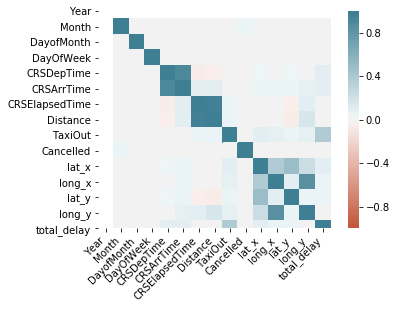

In [9]:
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
df.isnull().any()

Year              False
Month             False
DayofMonth        False
DayOfWeek         False
CRSDepTime        False
CRSArrTime        False
CRSElapsedTime    False
Origin            False
Dest              False
Distance          False
TaxiOut            True
Cancelled         False
AIRLINE           False
airport_x         False
lat_x             False
long_x            False
airport_y         False
lat_y             False
long_y            False
total_delay       False
dtype: bool

In [11]:
pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

,Missing Records,Percentage (%)
Year,0,0.000000
Month,0,0.000000
DayofMonth,0,0.000000
DayOfWeek,0,0.000000
CRSDepTime,0,0.000000
CRSArrTime,0,0.000000
CRSElapsedTime,0,0.000000
Origin,0,0.000000
Dest,0,0.000000
Distance,0,0.000000


In [12]:
df['TaxiOut'].fillna((df['TaxiOut'].mean()),inplace=True)

In [13]:
pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

,Missing Records,Percentage (%)
Year,0,0.0
Month,0,0.0
DayofMonth,0,0.0
DayOfWeek,0,0.0
CRSDepTime,0,0.0
CRSArrTime,0,0.0
CRSElapsedTime,0,0.0
Origin,0,0.0
Dest,0,0.0
Distance,0,0.0


In [14]:
df.dtypes

Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
CRSDepTime          int64
CRSArrTime          int64
CRSElapsedTime    float64
Origin             object
Dest               object
Distance            int64
TaxiOut           float64
Cancelled           int64
AIRLINE            object
airport_x          object
lat_x             float64
long_x            float64
airport_y          object
lat_y             float64
long_y            float64
total_delay       float64
dtype: object

In [15]:
df['Origin'].unique()

array(['LAX', 'SLC', 'PDX', 'SFO', 'DEN', 'DFW', 'MKE', 'CID', 'ORD',
       'BOS'], dtype=object)

In [16]:
df['Dest'].unique()

array(['LAS', 'LAX', 'ORD', 'SFO', 'SEA', 'PDX', 'BDL', 'SAN', 'RDU',
       'SJC', 'OAK', 'SMF', 'DEN', 'MSY', 'ABQ', 'LGA', 'PHX', 'TUS',
       'IAH', 'CLT', 'ATL', 'SLC', 'CVG', 'DFW', 'JFK', 'LGB', 'BUR',
       'BWI', 'JAX', 'MCI', 'MKE', 'XNA', 'PHL', 'DCA', 'HOU', 'BHM',
       'BNA', 'IND', 'ORF', 'ALB', 'AMA', 'AUS', 'BOI', 'BUF', 'CLE',
       'CMH', 'ELP', 'GEG', 'LBB', 'LIT', 'MAF', 'OKC', 'OMA', 'ONT',
       'PIT', 'PVD', 'RNO', 'SAT', 'SDF', 'SNA', 'STL', 'TUL', 'PSP',
       'FAT', 'EWR', 'MSP', 'DTW', 'SGU', 'CLD', 'MOD', 'ASE', 'COS',
       'BFL', 'MRY', 'SBA', 'SBP', 'IYK', 'SMX', 'YUM', 'OXR', 'IPL',
       'MTJ', 'ICT', 'GJT', 'MFR', 'DSM', 'JAC', 'DAL', 'MSN', 'LNK',
       'JAN', 'PNS', 'HSV', 'TYS', 'RIC', 'LEX', 'MEM', 'HPN', 'ROC',
       'SYR', 'BTV', 'BMI', 'GRB', 'EUG', 'RDM', 'OTH', 'LMT', 'ATW',
       'SPI', 'ACV', 'RDD', 'PMD', 'CEC', 'CIC', 'BZN', 'FCA', 'SUN',
       'CPR', 'TWF', 'IDA', 'MSO', 'RAP', 'YKM', 'DRO', 'SLE', 'HLN',
       'LWS', 'GTF',

In [17]:
df['AIRLINE'].unique()

array(['Skywest Airlines Inc.', 'American Eagle Airlines Inc.'],
      dtype=object)

In [18]:
df['airport_x'].unique()

array(['Los Angeles International', 'Salt Lake City Intl',
       'Portland Intl', 'San Francisco International', 'Denver Intl',
       'Dallas-Fort Worth International',
       'General Mitchell International', 'Eastern Iowa ',
       'Chicago OHare International', 'Gen Edw L Logan Intl'],
      dtype=object)

In [ ]:
df['Cancelled'].value_counts()

In [19]:
df['airport_y'].unique()

array(['McCarran International', 'Los Angeles International',
       'Chicago OHare International', 'San Francisco International',
       'Seattle-Tacoma Intl', 'Portland Intl', 'Bradley International',
       'San Diego International-Lindbergh ',
       'Raleigh-Durham International', 'San Jose International',
       'Metropolitan Oakland International', 'Sacramento International',
       'Denver Intl', 'New Orleans International ',
       'Albuquerque International', 'LaGuardia',
       'Phoenix Sky Harbor International', 'Tucson International',
       'George Bush Intercontinental', 'Charlotte/Douglas International',
       'William B Hartsfield-Atlanta Intl', 'Salt Lake City Intl',
       'Cincinnati Northern Kentucky Intl',
       'Dallas-Fort Worth International', 'John F Kennedy Intl',
       'Long Beach (Daugherty )', 'Burbank-Glendale-Pasadena',
       'Baltimore-Washington International', 'Jacksonville International',
       'Kansas City International', 'General Mitchell Inte

In [20]:
df.corr()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,TaxiOut,Cancelled,lat_x,long_x,lat_y,long_y,total_delay
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.029922,-0.004313,-0.009624,-0.016313,0.029294,0.026736,-0.013225,0.048961,0.002999,-0.025223,0.019047,-0.027637,-0.022239
DayofMonth,NaN,0.029922,1.000000,0.023931,-0.000749,-0.001913,-0.000842,-0.003940,-0.015863,0.011187,-0.016538,-0.020359,-0.006604,-0.017928,0.004751
DayOfWeek,NaN,-0.004313,0.023931,1.000000,0.018383,0.013984,0.000698,0.000106,-0.016174,0.001164,-0.005237,-0.031469,-0.001294,-0.029888,-0.022928
CRSDepTime,NaN,-0.009624,-0.000749,0.018383,1.000000,0.916412,-0.052750,-0.043865,-0.023978,0.003487,0.043952,0.024396,0.040372,-0.016233,0.090504
CRSArrTime,NaN,-0.016313,-0.001913,0.013984,0.916412,1.000000,0.089564,0.103409,-0.008332,0.001781,0.060702,0.064200,0.047843,0.081547,0.086991
CRSElapsedTime,NaN,0.029294,-0.000842,0.000698,-0.052750,0.089564,1.000000,0.976355,0.059563,-0.012916,0.000867,0.006806,-0.046046,0.105808,-0.003575
Distance,NaN,0.026736,-0.003940,0.000106,-0.043865,0.103409,0.976355,1.000000,0.047703,-0.013283,-0.032307,0.022429,-0.053217,0.170251,-0.014214
TaxiOut,NaN,-0.013225,-0.015863,-0.016174,-0.023978,-0.008332,0.059563,0.047703,1.000000,0.007390,0.103400,0.082599,0.056577,0.080600,0.373801
Cancelled,NaN,0.048961,0.011187,0.001164,0.003487,0.001781,-0.012916,-0.013283,0.007390,1.000000,0.008094,0.001148,0.007575,-0.001951,-0.024557


In [21]:
df=pd.get_dummies(df,columns=['airport_x', 'airport_y','AIRLINE','Origin','Dest'],drop_first=True)
df

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,TaxiOut,Cancelled,...,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYR,Dest_TYS,Dest_VPS,Dest_WYS,Dest_XNA,Dest_YKM,Dest_YUM
0,2008,2,3,7,1335,1613,158.0,236,20.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008,2,22,5,2102,2349,167.0,236,14.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008,1,1,2,730,840,70.0,236,9.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008,1,4,5,730,840,70.0,236,25.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,1,7,1,730,840,70.0,236,18.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138506,2008,8,20,3,1330,1508,38.0,85,18.0,0,...,0,0,0,0,0,0,0,0,0,0
138507,2008,8,22,5,1330,1508,38.0,85,19.0,0,...,0,0,0,0,0,0,0,0,0,0
138508,2008,8,25,1,2020,2158,38.0,85,9.0,0,...,0,0,0,0,0,0,0,0,0,0
138509,2008,8,28,4,1330,1508,38.0,85,17.0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
index=df.columns.get_loc('Cancelled')
index

9

In [23]:
df['Cancelled'].value_counts()

0    138380
1       131
Name: Cancelled, dtype: int64

In [24]:
X=df.drop(['Cancelled'],axis=1)
y=df['Cancelled']

In [25]:
X.shape

(138511, 435)

In [26]:
y.value_counts()

0    138380
1       131
Name: Cancelled, dtype: int64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, shuffle='True',random_state=100,stratify=y)

In [31]:
X_train.shape

(96957, 435)

In [29]:
Y_train.shape

(96957,)

In [30]:
X_test.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'CRSElapsedTime', 'Distance', 'TaxiOut', 'lat_x',
       ...
       'Dest_TVC', 'Dest_TWF', 'Dest_TXK', 'Dest_TYR', 'Dest_TYS', 'Dest_VPS',
       'Dest_WYS', 'Dest_XNA', 'Dest_YKM', 'Dest_YUM'],
      dtype='object', length=435)

#### Sampling

#### Under Sampling

#### over sampling

In [32]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy=0.6)

x_train_res,y_train_res=os.fit_sample(X_train, Y_train)

X_s_train = x_train_res
y_s_train = y_train_res

Using TensorFlow backend.


In [33]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_s_train)))

Original dataset shape Counter({0: 138380, 1: 131})
Resampled dataset shape Counter({0: 96865, 1: 58119})


In [34]:
c=np.unique(y_s_train)
c

array([0, 1], dtype=int64)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr=LogisticRegression()
lr.fit(X_s_train,y_s_train)
cross_val_score(lr, X_s_train, y_s_train, cv=7)

C:\Users\arbet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arbet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arbet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arbet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arbet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.98459871, 0.98328892, 0.98166298, 0.98685696, 0.98220496,
       0.98188799, 0.98084828])

In [36]:
from sklearn.metrics import accuracy_score
lr_pred = lr.predict(X_test)
acc_test = accuracy_score(Y_test, lr_pred)
auc_test = roc_auc_score(Y_test, lr_pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

Accuracy (test set): 0.973985657217115
AUC (test set): 0.961363671456409


In [37]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test, lr_pred)
cm_lr

array([[40436,  1079],
       [    2,    37]], dtype=int64)

Text(0.5, 0, 'FPS')

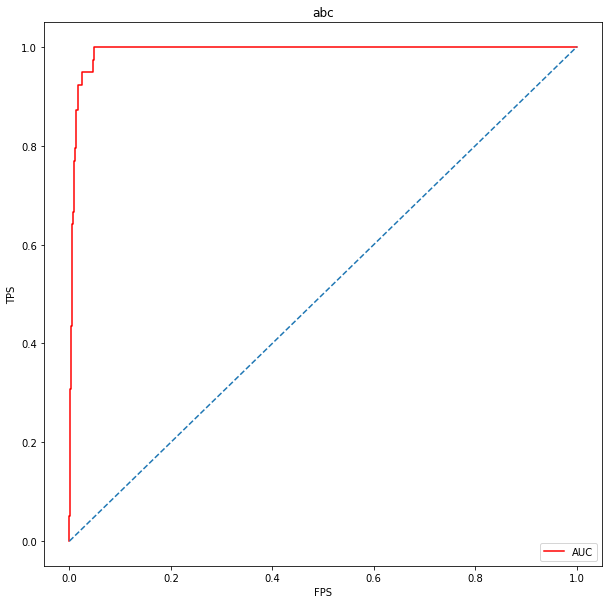

In [38]:
import matplotlib.pyplot as plt
y_hat=[x[1] for x in lr.predict_proba(X_test)]
fps,tps,thresholds=roc_curve(Y_test,y_hat)

plt.figure(figsize=(10,10))
plt.title('abc')
plt.plot(fps,tps,color='r',label='AUC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis='right'
plt.ylabel('TPS')
plt.xlabel('FPS')

In [39]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt=DecisionTreeClassifier(max_leaf_nodes=6,max_depth=10)
dt.fit(X_s_train,y_s_train)
cross_val_score(dt, X_s_train, y_s_train, cv=8)

array([0.96469495, 0.96557064, 0.96221545, 0.96448666, 0.96304135,
       0.96551902, 0.9631962 , 0.96365889])

In [41]:
from sklearn.metrics import accuracy_score
dt_pred = dt.predict(X_test)
acc_test = accuracy_score(Y_test, dt_pred)
auc_test = roc_auc_score(Y_test, dt_pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

Accuracy (test set): 0.9682100399480195
AUC (test set): 0.9456646809772187


In [42]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(Y_test, dt_pred)
cm_dt

array([[40197,  1318],
       [    3,    36]], dtype=int64)

Text(0.5, 0, 'FPS')

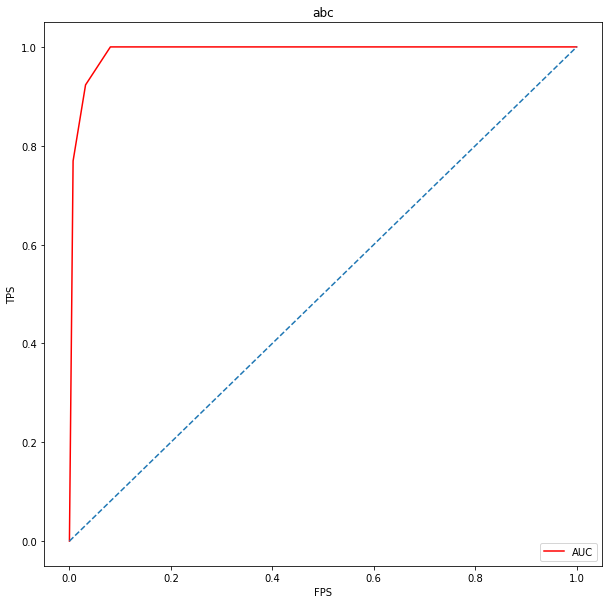

In [44]:
import matplotlib.pyplot as plt
y_hat=[x[1] for x in dt.predict_proba(X_test)]
fps,tps,thresholds=roc_curve(Y_test,y_hat)

plt.figure(figsize=(10,10))
plt.title('abc')
plt.plot(fps,tps,color='r',label='AUC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis='right'
plt.ylabel('TPS')
plt.xlabel('FPS')

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=6)
rfc.fit(X_s_train,y_s_train)
cross_val_score(rfc, X_s_train, y_s_train, cv=8)

array([0.89382678, 0.95571156, 0.98265627, 0.96180251, 0.96779022,
       0.97295205, 0.9748103 , 0.97114392])

In [49]:
from sklearn.metrics import accuracy_score
rfc_pred = rfc.predict(X_test)
acc_test = accuracy_score(Y_test, rfc_pred)
auc_test = roc_auc_score(Y_test, rfc_pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

Accuracy (test set): 0.9880155941666265
AUC (test set): 0.7634497262342619


In [50]:
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(Y_test, rfc_pred)
cm_rfc

array([[41035,   480],
       [   18,    21]], dtype=int64)

Text(0.5, 0, 'FPS')

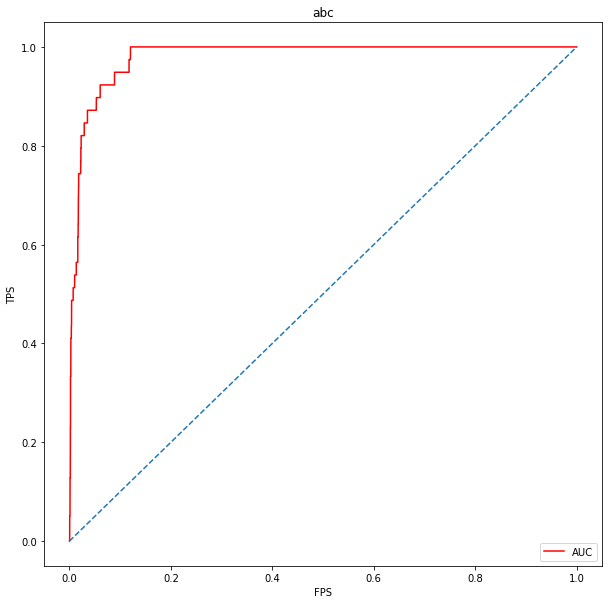

In [51]:
import matplotlib.pyplot as plt
y_hat=[x[1] for x in rfc.predict_proba(X_test)]
fps,tps,thresholds=roc_curve(Y_test,y_hat)

plt.figure(figsize=(10,10))
plt.title('abc')
plt.plot(fps,tps,color='r',label='AUC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis='right'
plt.ylabel('TPS')
plt.xlabel('FPS')

In [52]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_s_train,y_s_train)
cross_val_score(rfc, X_s_train, y_s_train, cv=8)

array([0.97527614, 0.96500284, 0.97068084, 0.9578279 , 0.95168534,
       0.97419088, 0.95860218, 0.97883543])

In [53]:
from sklearn.metrics import accuracy_score
abc_pred = abc.predict(X_test)
acc_test = accuracy_score(Y_test, abc_pred)
auc_test = roc_auc_score(Y_test, abc_pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

Accuracy (test set): 0.9868123405688983
AUC (test set): 0.9421660999885738


Text(0.5, 0, 'FPS')

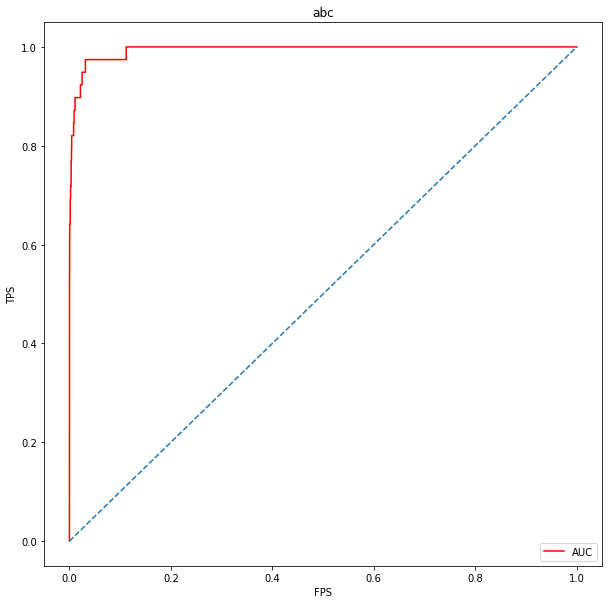

In [54]:
import matplotlib.pyplot as plt
y_hat=[x[1] for x in abc.predict_proba(X_test)]
fps,tps,thresholds=roc_curve(Y_test,y_hat)

plt.figure(figsize=(10,10))
plt.title('abc')
plt.plot(fps,tps,color='r',label='AUC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis='right'
plt.ylabel('TPS')
plt.xlabel('FPS')

In [55]:
from sklearn.metrics import confusion_matrix
cm_abc = confusion_matrix(Y_test, abc_pred)
cm_abc

array([[40971,   544],
       [    4,    35]], dtype=int64)

In [56]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_s_train,y_s_train)
cross_val_score(nb, X_s_train, y_s_train, cv=8)

array([0.91142769, 0.91292004, 0.91384917, 0.91560419, 0.91245548,
       0.91539772, 0.91085531, 0.9137931 ])

In [57]:
from sklearn.metrics import accuracy_score
nb_pred = nb.predict(X_test)
acc_test = accuracy_score(Y_test, nb_pred)
auc_test = roc_auc_score(Y_test, nb_pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

Accuracy (test set): 0.8643692544640709
AUC (test set): 0.7784192923781024


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, nb_pred)
cm

array([[35891,  5624],
       [   12,    27]], dtype=int64)

Text(0.5, 0, 'FPS')

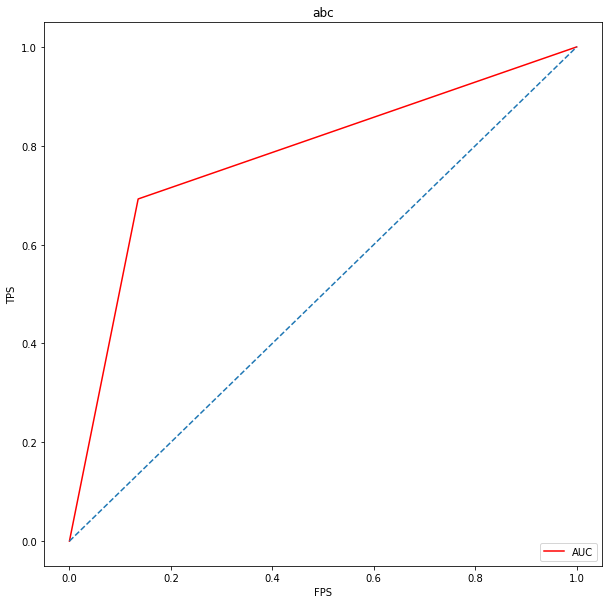

In [60]:
import matplotlib.pyplot as plt
y_hat=[x[1] for x in nb.predict_proba(X_test)]
fps,tps,thresholds=roc_curve(Y_test,y_hat)

plt.figure(figsize=(10,10))
plt.title('abc')
plt.plot(fps,tps,color='r',label='AUC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis='right'
plt.ylabel('TPS')
plt.xlabel('FPS')

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_s_train,y_s_train)
cross_val_score(nb, X_s_train, y_s_train, cv=8)

array([0.91142769, 0.91292004, 0.91384917, 0.91560419, 0.91245548,
       0.91539772, 0.91085531, 0.9137931 ])

In [63]:
from sklearn.metrics import accuracy_score
knn_pred = classifier.predict(X_test)
acc_test = accuracy_score(Y_test, knn_pred)
auc_test = roc_auc_score(Y_test, knn_pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

Accuracy (test set): 0.9967752803580883
AUC (test set): 0.5116643042212113


In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, knn_pred)
cm

array([[41419,    96],
       [   38,     1]], dtype=int64)

Text(0.5, 0, 'FPS')

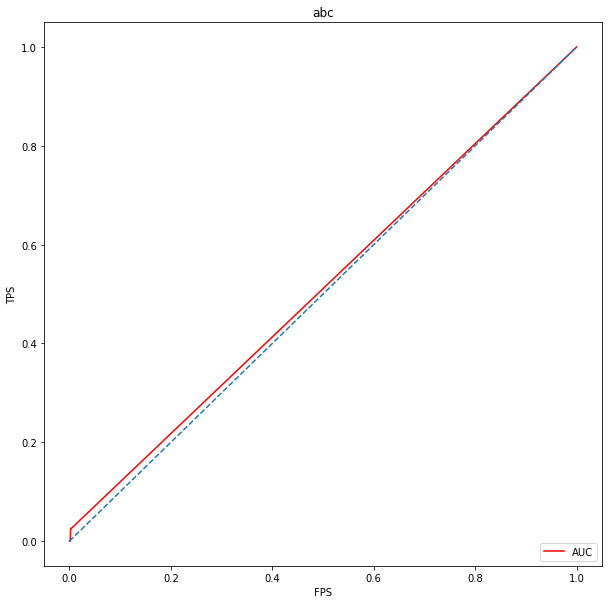

In [65]:
import matplotlib.pyplot as plt
y_hat=[x[1] for x in classifier.predict_proba(X_test)]
fps,tps,thresholds=roc_curve(Y_test,y_hat)

plt.figure(figsize=(10,10))
plt.title('abc')
plt.plot(fps,tps,color='r',label='AUC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis='right'
plt.ylabel('TPS')
plt.xlabel('FPS')

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_s_train,y_s_train)

In [ ]:
from sklearn.metrics import accuracy_score
pred = svm.predict(X_test)
acc_test = accuracy_score(Y_test, pred)
auc_test = roc_auc_score(Y_test, pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

In [ ]:
df['Cancelled'].value_counts()

In [ ]:
def create_tree_classifier(classifier,X_train,y_train):

    grid_search = None
    best_classifier = None
    accuracy = 0
    auc = 0
    
    print('Treating ', classifier[0])
    
    ### BEGIN SOLUTION    

    if classifier[0] == 'DecisionTree':
        parameters = {'min_samples_leaf':[1,5,10],'max_depth':[None,10,20]}
    elif classifier[0] == 'RandomForest':
        parameters = {'min_samples_leaf':[5,10],'n_estimators':[10,30,50]}
    elif classifier[0] == 'AdaBoost':
        parameters = {'learning_rate':[0.5,1],'n_estimators':[10,30,50]}
    
    grid_search = GridSearchCV(classifier[1], parameters, cv=10)
    grid_search.fit(X_s_train, y_s_train.values.reshape(-1,))
    
    pred = grid_search.predict(X_s_train)
    
    accuracy = accuracy_score(y_s_train, pred)
    auc = roc_auc_score(y_s_train, pred)
    best_classifier = grid_search.best_estimator_
        
    ### END SOLUTION
    
    return grid_search, best_classifier, accuracy, auc

In [ ]:
gsr, bc, acc, auc = create_tree_classifier(('DecisionTree',DT()),X_s_train,y_s_train) 
print('Best classifier:',bc)
pred = bc.predict(X_test)
acc_test = accuracy_score(Y_test, pred)
auc_test = roc_auc_score(Y_test, pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

In [ ]:
gsr, bc, acc, auc = create_tree_classifier(('RandomForest',RF()),X_s_train,y_s_train) 
print('Best classifier:',bc)
pred = bc.predict(X_test)
acc_test = accuracy_score(Y_test, pred)
auc_test = roc_auc_score(Y_test, pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

In [ ]:
gsr, bc, acc, auc = create_tree_classifier(('AdaBoost',AdaBoost()),X_s_train,y_s_train) 
print('Best classifier:',bc)
pred = bc.predict(X_test)
acc_test = accuracy_score(Y_test, pred)
auc_test = roc_auc_score(Y_test, pred)
print("Accuracy (test set):",acc_test)
print("AUC (test set):",auc_test)

In [ ]:
def return_most_important_features(estimator,X_test,y_test):

    important_features = set()
    
    estimator.fit(X_test,y_test.values.reshape(-1,))
    
    ### BEGIN SOLUTION 
    for c, column in enumerate(X_test.columns):
        if estimator.feature_importances_[c] in sorted(estimator.feature_importances_)[-6:]:
            important_features.add(column)
    ### END SOLUTION
    
    return important_features

In [ ]:
classifier = DT(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

return_most_important_features(classifier,X_test,Y_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score



# The gamma parameter is the kernel coefficient for kernels rbf/poly/sigmoid
svm = SVC()

svm.fit(X_s_train,y_s_train.values.ravel())
prediction = svm.predict(X_test)
print('Accuracy:', accuracy_score(Y_test,prediction))
print('AUC:',roc_auc_score(Y_test,prediction))

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear','poly','rbf'],'C':[0.2,0.5,1.0]}

grid_search = GridSearchCV(SVC(gamma='auto'), parameters, cv=5,scoring='roc_auc')
grid_search.fit(X_s_train, y_s_train.values.ravel())

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

print('Mean AUC (+/- standard deviation), for parameters')
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/- %0.03f) for %r"
          % (mean, std, params))

In [ ]:

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# calculate AUC
auc = roc_auc_score(y_test, prediction)
print('AUC: %.3f' % auc)